In [1]:
#import below libraries
import awswrangler as wr
import pandas as pd
import boto3
import warnings 
warnings.filterwarnings('ignore')
import configparser

In [2]:
#reading the credentials securely.
credents = configparser.ConfigParser()

In [4]:
#use read_file method
credents.read('C:\Fall 2022 courses\Project\GRA-Data-Engineering-Work\secret.config')

['C:\\Fall 2022 courses\\Project\\GRA-Data-Engineering-Work\\secret.config']

In [5]:
#Reading in the credentials into Python variables. No can see them
aws_key = credents["AWS"]["KEY"]
aws_secret = credents["AWS"]["SECRET"]
region = credents["AWS"]["REGION"]

In [6]:
#Creating the Session
your_session = boto3.Session(aws_access_key_id=aws_key,
                            aws_secret_access_key=aws_secret,
                            region_name=region)

In [7]:
#verifying your session by listing the buckets
your_buckets = wr.s3.list_buckets(boto3_session=your_session)
your_buckets

['walmart-east-2-usama']

In [8]:
 # Creating new S3 bucket

#Create bucket name
bucket_name='walmart-east-2-tracker'

#Create Bucket
s3client=your_session.client('s3')
s3client.create_bucket(Bucket=bucket_name)


{'ResponseMetadata': {'RequestId': '4739PQSMEWC5W8PY',
  'HostId': '2uJrqCHxyliLLULmMvUistGylMuUgr8Nno560B/p4RmrnwooaVBXsHt1cBGbTWEZs6to+1WT698=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '2uJrqCHxyliLLULmMvUistGylMuUgr8Nno560B/p4RmrnwooaVBXsHt1cBGbTWEZs6to+1WT698=',
   'x-amz-request-id': '4739PQSMEWC5W8PY',
   'date': 'Mon, 26 Jun 2023 01:13:04 GMT',
   'location': '/walmart-east-2-tracker',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'Location': '/walmart-east-2-tracker'}

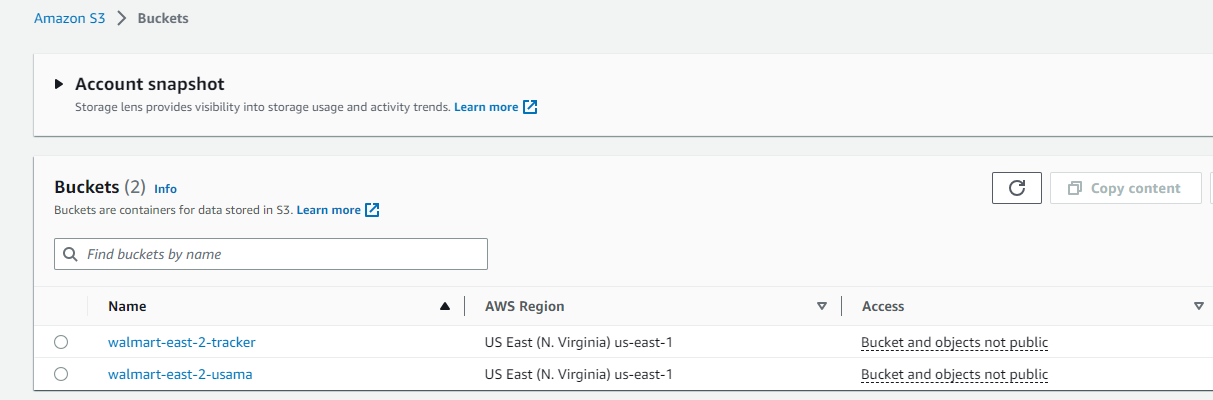

In [20]:
## running Athena queries

## setup Athena 
athena_client = your_session.client('athena')

## Setup the query
DATABASE_NAME = "ccindex"
RESULT_OUTPUT_LOCATION = "s3://walmart-east-2-usama/walmart_laptops_2018/"

def create_database():
    response = athena_client.start_query_execution(
        QueryString=f"create database {DATABASE_NAME}",
        ResultConfiguration={"OutputLocation": RESULT_OUTPUT_LOCATION}
    )

    return response["QueryExecutionId"]

# Create database
create_database()

'49e709f2-9805-4a08-b79f-559748755dd2'

In [28]:
## Create a DDL file for table in Athena

create_table_query="""
CREATE EXTERNAL TABLE IF NOT EXISTS ccindex (
  url_surtkey                   STRING,
  url                           STRING,
  url_host_name                 STRING,
  url_host_tld                  STRING,
  url_host_2nd_last_part        STRING,
  url_host_3rd_last_part        STRING,
  url_host_4th_last_part        STRING,
  url_host_5th_last_part        STRING,
  url_host_registry_suffix      STRING,
  url_host_registered_domain    STRING,
  url_host_private_suffix       STRING,
  url_host_private_domain       STRING,
  url_protocol                  STRING,
  url_port                      INT,
  url_path                      STRING,
  url_query                     STRING,
  fetch_time                    TIMESTAMP,
  fetch_status                  SMALLINT,
  content_digest                STRING,
  content_mime_type             STRING,
  content_mime_detected         STRING,
  content_charset               STRING,
  content_languages             STRING,
  warc_filename                 STRING,
  warc_record_offset            INT,
  warc_record_length            INT,
  warc_segment                  STRING)
PARTITIONED BY (
  crawl                         STRING,
  subset                        STRING)
  STORED AS parquet
LOCATION 's3://commoncrawl/cc-index/table/cc-main/warc/';
"""

#create function to run query

def create_table():
    response = athena_client.start_query_execution(
        QueryString=f"create table {create_table_query}",
        ResultConfiguration={"OutputLocation": RESULT_OUTPUT_LOCATION}
    )

    return response["QueryExecutionId"]

# Create table
create_table()

SyntaxError: invalid syntax (4024414998.py, line 3)

In [29]:
# Run a query to to make Athena recognize the data partitions on S3, you have to execute the SQL statement

query= "MSCK REPAIR TABLE ccindex"

#create function to run query
def data_partition_understand():
    response = athena_client.start_query_execution(
        QueryString=f"create table {query}",
        ResultConfiguration={"OutputLocation": RESULT_OUTPUT_LOCATION}
    )

    return response["QueryExecutionId"]

# Create table
data_partition_understand()

InvalidRequestException: An error occurred (InvalidRequestException) when calling the StartQueryExecution operation: line 1:19: mismatched input 'REPAIR'. Expecting: 'OR', 'SCHEMA', 'TABLE', 'VIEW'